# Tutorial 4: Learning to sample

Today in lecture we learned how to setup aa probabilistic graphical models. However, it's very easy to construct such a hierarchical model that no longer permits tractable posteriors (e.g, even a single layer NN will have an intractable evidence term $p(x)$ for integrating over the NN weights and biases, $\theta$. 

Therefore, we started building up a set of sampling techniques so we can calculate intractable integrals by Monte Carlo (MC), e.g, with rejection sampling or importance sampling.

Importance sampling was _lovely_ but the "trick" (or dark art) was how to find a good proposal distribution... Finding the perfect proposal distribution would account to already _knowing_ the density we're trying to solve for (🐓 vs. 🐣).

Markov Chain Monte Carlo methods introduce an adaptive proposal distribution to sample from a (possibly unnormalized) distribution of interest.

Today we're going to code up a probabilistic model for a mixture of Gaussians

## Step 1: The Probabilistic Graphical model

Consider a Gaussian mixture model:

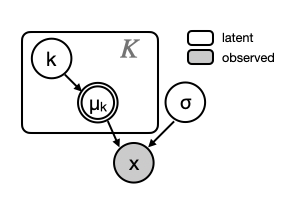

- $k\sim \{ 0, 1,2,3,4\}$, randomly sampled from a set of $K=5$ modes
- The mode determines the mean $
\mu_k = 
\begin{pmatrix} \cos \frac{2\pi k}{5}\\
 \sin  \frac{2\pi k}{5} 
\end{pmatrix}
$
- $x \sim \mathcal{N}(\mu_k, \sigma^2)$

(A.k.a, the Bayes net specifies)

The graph factorizes nicely, and the probability is easy to write down ( even the evidence )!

$$p(x) = \sum_{k=0}^4 \frac{1}{5}p(x | \mu_k, \sigma )$$

For this exercise, let's pretend like we don't know how to sample from $p(x)$ and implement the Metropolis Hastings algorithm for the sampling!

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
'''
Hyperparameters
'''
K = 5

# Now define the variables for the model
k = np.arange(K )
mu = np.column_stack([np.cos(2 * np.pi * k / K), np.sin(2 * np.pi * k / K) ])
std = 0.2

In [6]:
mu.shape

(5, 2)

In [7]:
mu[0]

array([1., 0.])

Text(0, 0.5, '$x_1$')

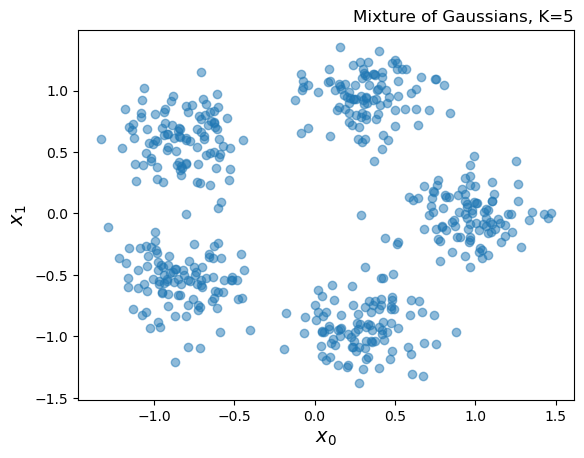

In [ ]:
'''
Setup: I want to learn how to sample from this distribution
'''

for i, mu_i in enumerate(mu):

    z = np.random.randn(100, 2)
    x = mu_i + std * z
    plt.scatter(*x.T,color='C0',alpha=0.5,label=f'Cluster {i+1}')
plt.title(f'Mixture of Gaussians, K={K}',loc='right')
plt.xlabel('$x_0$',fontsize=14)
plt.ylabel("$x_1$", fontsize=14)

In [9]:
from scipy.stats import multivariate_normal

In [10]:
def get_prob(x):
    '''
    For a given x \in R^2, calculate the probability of the point
    '''

    pk=0
    for mu_k in mu:
        pk += 1/K * multivariate_normal(mean=mu_k, cov=std**2 * np.eye(2)).pdf(x)

    return pk


<>:3: SyntaxWarning: invalid escape sequence '\i'
<>:3: SyntaxWarning: invalid escape sequence '\i'
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_67956/3706398277.py:3: SyntaxWarning: invalid escape sequence '\i'
  For a given x \in R^2, calculate the probability of the point


In [14]:
[xx,yy] = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
grid = np.column_stack([xx.ravel(), yy.ravel()])
probs = np.array([get_prob(x) for x in grid])
probs = probs.reshape(xx.shape)

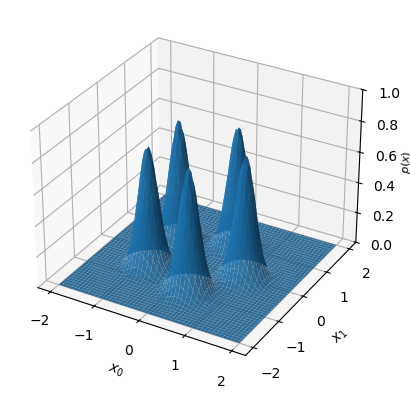

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Plot the surface.

ax.plot_surface(xx,yy, probs,color='C0',alpha=.9)#cmap=plt.cm.Blues)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r"$x_0$")
ax.set_ylabel(r"$x_1$")
ax.set_zlabel(r"$p(x)$",fontsize=8,labelpad=0)

plt.show()


In [ ]:
def draw_sample(x0, std_p = std):
    '''
    x0: Current state of the system
    std_p: Standard deviation of the proposal distribution
    '''

    # Sample x_new ~ Q(x1 | x0) = N(x0, sigma^2)
    
    # Calculate acceptance ratio
    
    # Calculate the acceptance probability
    # A = min(1, P(x') Q(x|x') / P(x) Q(x' | x))
    
    # Sample u ~ Uniform(0,1)


    raise NotImplementedError

Nb: B/c the Gaussian distribution is symmetric, $Q(x |x') = Q(x'|x)$, so these terms will cancel in the acceptance ratio.

I leave the option here for the solution though so that you have the generality to implement other proposal distributions.


In [ ]:
'''
Sample the initial condition b/w [-1.5, 1.5]
'''
x_init =  ... # your code

'''
Your code for running MH
'''


**Tasks:**
- [ ] Plot the samples
- [ ] Determine the number of burn in steps
- [ ] Plot the acceptance rate
- [ ] Plot the auto correlation
- [ ] Rerun for a few different chains

**Autocorrelation:**

$$R_x (l) = \frac{\sum_{t=1}^{n-l} (x_t - \bar{x}) (x_{t+l} - \bar{x})}{\sum_{t=1}^{n-l}(x_t - \bar{x})^2}$$

In [1]:
'''
Your code
'''

'\nYour code\n'

**Checking your intuition:**
- What was the initial distribution, $\pi^{0}(x)?$
    - **Your A:**
- What was is the final stationary distribution, $\pi(x)$?
    - **Your A:**  

**Question:** Would changing the $\sigma_p$ in the proposal distribution modify the acceptance rate?
 
**Your Anaswer:** 

**Bonus (idea):** Swap out the propoosal distribtution w/ one that is not symmetric to swapping $x$ and $x'$.
- For example, can consider: https://en.wikipedia.org/wiki/Exponentially_modified_Gaussian_distribution
- How does the acceptance probability change as you increase (or decrease) the width of the distribution?

(Left as an exercise to the student)